In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Plot disorder 

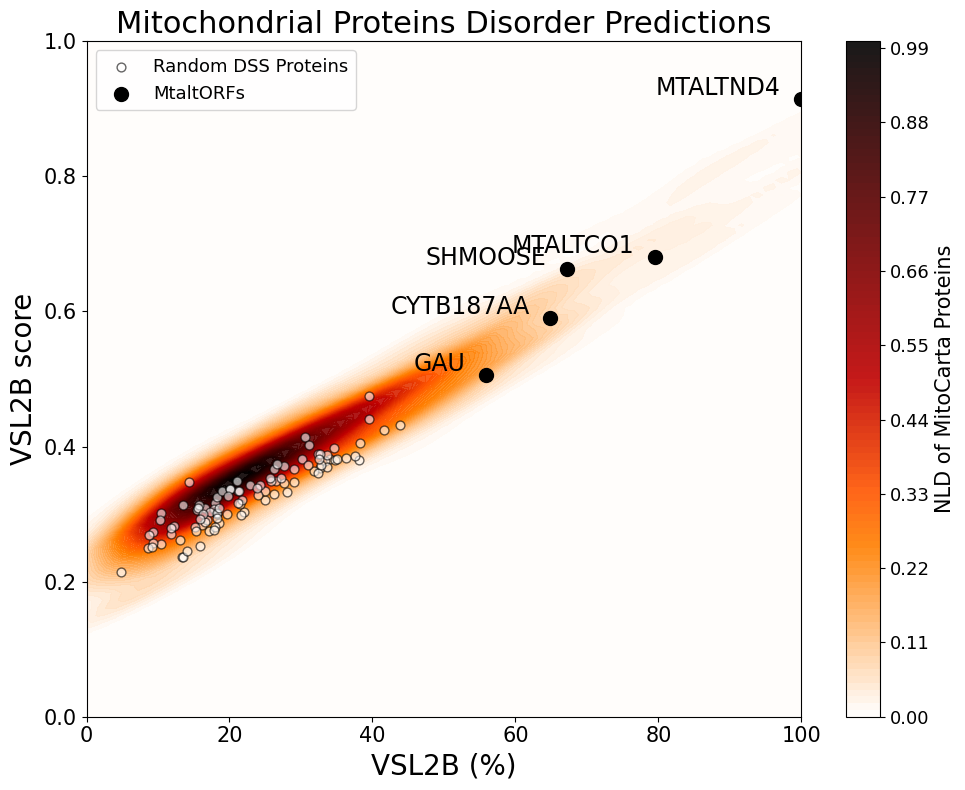

In [2]:
# This plots the disorder of MitoCarta proteins, Alternative Proteins and 
# Degenerate Proteins made from the CO1 sequence that nests MTALTCO1, all > 31 amino acids in length

# load ridao outputs
file_1 = "/Users/francisrobitaille/Downloads/mitocarta_radio/MDP_MODE/results.txt"  # MitoCarta proteins
file_2 = '/Users/francisrobitaille/Downloads/ridao_random_100/MDP_MODE/results.txt'  # Random degenerate proteins
file_3 = '/Users/francisrobitaille/Downloads/altorfs_ridao - Sheet1.csv'  # confirmed ALTORFs 

df1 = pd.read_csv(file_1, skipinitialspace=True)
df2 = pd.read_csv(file_2, skipinitialspace=True)
df3 = pd.read_csv(file_3)

#extract data
x_vals = df1['PER(VSL2B)']
y_vals = df1['RNK(VSL2B)']

df2_x = df2['PER(VSL2B)']
df2_y = df2['RNK(VSL2B)']

overlay_ids = df3.iloc[:, 0].values
overlay_x = df3.iloc[:, 1].values
overlay_y = df3.iloc[:, 2].values

xy = np.vstack([x_vals, y_vals])
kde = gaussian_kde(xy)

# KDE grid
xmin, xmax = 0, 100
ymin, ymax = 0, 1
x_range, y_range = xmax - xmin, ymax - ymin

xgrid, ygrid = np.mgrid[
    xmin - 0.05 * x_range:xmax + 0.05 * x_range:100j,
    ymin - 0.05 * y_range:ymax + 0.05 * y_range:100j
]
positions = np.vstack([xgrid.ravel(), ygrid.ravel()])
density = kde(positions).reshape(xgrid.shape)

# Log-normalize, Log gives better definition near 0 density
density_log = np.log1p(density)
density_log_normalized = (density_log - np.min(density_log)) / (np.max(density_log) - np.min(density_log))


plt.figure(figsize=(10, 8))
contour = plt.contourf(xgrid, ygrid, density_log_normalized, levels=100, cmap="gist_heat_r", alpha=0.9)
cbar = plt.colorbar(contour)
cbar.set_label('NLD of MitoCarta Proteins', fontsize=15)
cbar.ax.tick_params(labelsize=13)

# simulated degenerate sequences
plt.scatter(df2_x, df2_y, color='white', edgecolor='black', s=40, alpha=0.6, label='Random DSS Proteins', zorder=4)

# real alternative proteins
plt.scatter(overlay_x, overlay_y, color='black', edgecolor='black', s=100, label='MtaltORFs', zorder=5)

for i, txt in enumerate(overlay_ids):
    plt.annotate(
        txt,
        (overlay_x[i], overlay_y[i]),
        xytext=(-15, 3),
        textcoords="offset points",
        ha='right',
        fontsize=17,
        color='black',
        zorder=6
    )

plt.xlabel('VSL2B (%)', fontsize=20)
plt.ylabel('VSL2B score', fontsize=20)
plt.title('Mitochondrial Proteins Disorder Predictions', fontsize=22)
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

